In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sktree import ObliqueRandomForestClassifier, PatchObliqueRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import nibabel as nb

In [124]:
df = pd.read_excel('Human.parcellated_thickness.xlsx')

In [125]:
df.head()

,Unnamed: 0,sid,Markov.1,Markov.2,Markov.3,Markov.4,Markov.5,Markov.6,Markov.7,Markov.8,...,Schaefer217.191,Schaefer217.192,Schaefer217.193,Schaefer217.194,Schaefer217.195,Schaefer217.196,Schaefer217.197,Schaefer217.198,Schaefer217.199,Schaefer217.200
0,0,sub-OAS30876MRD4592,1.995032,2.203564,1.651978,1.969754,2.603206,2.295727,2.385144,2.719692,...,8.193966,7.736098,7.404804,7.431338,7.541022,7.433447,7.475594,7.460332,7.476401,7.609443
1,1,sub-HBN_CBIC_NDARXC962XNK,2.557198,2.011555,2.175673,1.863080,2.473705,2.576267,2.392282,2.242582,...,6.927265,7.487809,7.098700,6.753360,6.841211,6.707229,7.189156,6.795299,6.823550,6.533783
2,2,sub-AOMIC_0770,2.246607,2.295872,1.978412,2.069700,2.213602,2.449572,2.541624,2.777280,...,8.117053,7.775745,7.608771,7.579930,7.573511,7.607256,7.883723,7.630075,7.670835,7.354955
3,3,sub-AOMIC_0344,2.219745,2.366237,2.036068,2.173696,2.508847,2.408997,2.430510,2.882698,...,7.908504,7.856069,7.756918,7.526684,7.410575,7.654072,7.952062,7.682724,7.444550,7.697996
4,4,sub-Narratives_150,2.131236,2.432549,2.066158,2.352589,2.331565,2.799966,2.490590,2.818574,...,8.229232,7.847060,7.821367,7.739102,8.001608,7.803380,7.750091,7.730715,7.858832,7.892026


In [127]:
df_sex = pd.read_excel('~/data_MRI/subjects_age_sex_data_MRI.xlsx')
df_sex.head()

,ID,Age,Sex,Dataset,Dataset-ID
0,sub-ABIDE1050339,18.0000,MALE,ABIDE,50339
1,sub-ABIDE1050701,18.0000,MALE,ABIDE,50701
2,sub-ABIDE1050445,18.1383,MALE,ABIDE,50445
3,sub-ABIDE1050459,18.1547,MALE,ABIDE,50459
4,sub-ABIDE1050341,18.2000,FEMALE,ABIDE,50341


In [128]:
X1 = []
X2 = []
y = []
IDs = set(df['sid'])
ref_IDs = set(df_sex['ID'])

for subject in tqdm(IDs):
    if subject in ref_IDs:
        features = np.array(df[df['sid']==subject]).reshape(-1)[2:]
        gender = list(df_sex[df_sex['ID']==subject]['Sex'])
        sex = int(gender[0]=='FEMALE')
             
        X1.append(list(features[:182]))
        X2.append(list(features[182:]))
        y.append(sex)

X1 = np.array(X1)
X2 = np.array(X2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14465/14465 [00:32<00:00, 441.35it/s]


In [129]:
print(X1.shape, X2.shape)

(10648, 182) (10648, 200)


### Try random forest

In [130]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X1, y, train_size=0.8, random_state=ii, stratify=y)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:20<00:00,  4.19s/it]

Accuracy is  0.7057276995305164


In [131]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X1, y, train_size=0.8, random_state=ii, stratify=y)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:19<00:00,  3.93s/it]

Accuracy is  0.7063849765258217


## Try SPORF

In [72]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X1, y, train_size=0.8, random_state=ii, stratify=y)
    clf = ObliqueRandomForestClassifier(n_estimators=1000, n_jobs=-1, feature_combinations=2.3)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.79s/it]

Accuracy is  0.7112676056338028


In [80]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X2, y, train_size=0.8, random_state=ii, stratify=y)
    clf = ObliqueRandomForestClassifier(n_estimators=1000, n_jobs=-1, feature_combinations=1.8)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.73s/it]

Accuracy is  0.7070422535211267


In [81]:
df = pd.read_excel('Macaque.parcellated_thickness.xlsx')
df.head()

,Unnamed: 0,participant_id,age,sex,Markov.1,Markov.2,Markov.3,Markov.4,Markov.5,Markov.6,...,Schaefer217.191,Schaefer217.192,Schaefer217.193,Schaefer217.194,Schaefer217.195,Schaefer217.196,Schaefer217.197,Schaefer217.198,Schaefer217.199,Schaefer217.200
0,0,sub-1001,1.756164,M,3.048436,3.908286,3.221595,3.615675,4.662432,3.707754,...,4.231826,4.908868,4.522730,2.294943,2.853976,3.406234,4.261370,4.131977,3.387978,3.451267
1,1,sub-1002,1.783562,F,3.053520,3.748308,3.043567,3.764927,4.708283,4.060617,...,4.384853,4.849508,4.589500,2.443734,2.855187,3.344378,3.926697,3.477919,2.962553,3.474969
2,2,sub-1003,1.756164,M,3.211265,4.122524,3.374628,4.022762,4.759439,4.182558,...,4.570739,4.921833,4.770724,3.106145,3.094785,3.350355,4.562199,4.212585,3.582792,3.827813
3,3,sub-1004,1.756164,M,3.004275,3.681716,3.227427,3.762712,4.555942,3.984013,...,4.264869,4.935628,4.505048,3.337418,2.892611,3.690076,4.095378,4.328465,3.763171,3.758017
4,4,sub-1005,1.742466,M,2.868796,3.837011,2.997172,3.724171,4.537298,3.816082,...,4.154663,4.817727,4.695378,3.965287,3.219764,3.268439,4.115168,3.889531,3.271547,4.040183


In [82]:
df_sex = pd.read_csv('~/spmmouse_segment/uwmadison.csv')
df_sex.head()

,participant_id,age,sex
0,sub-1001,1.756164,M
1,sub-1002,1.783562,F
2,sub-1003,1.756164,M
3,sub-1004,1.756164,M
4,sub-1005,1.742466,M


In [103]:
X1 = []
X2 = []
y = []
IDs = set(df['participant_id'])
ref_IDs = set(df_sex['participant_id'])

for subject in tqdm(IDs):
    if subject in ref_IDs:
        features = np.array(df[df['participant_id']==subject]).reshape(-1)[4:]
        gender = list(df_sex[df_sex['participant_id']==subject]['sex'])
        sex = int(gender[0]=='F')
             
        X1.append(list(features[:182]))
        X2.append(list(features[182:]))
        y.append(sex)

X1 = np.array(X1)
X2 = np.array(X2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 592/592 [00:00<00:00, 1329.79it/s]


In [104]:
print(X1.shape, X2.shape)

(592, 182) (592, 200)


### Try random forest

In [106]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X1, y, train_size=0.8, random_state=ii, stratify=y)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.85s/it]

Accuracy is  0.6453781512605041


In [107]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X1, y, train_size=0.8, random_state=ii, stratify=y)
    clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:09<00:00,  1.94s/it]

Accuracy is  0.6504201680672269


### Try SPORF

In [115]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X1, y, train_size=0.8, random_state=ii, stratify=y)
    clf = ObliqueRandomForestClassifier(n_estimators=1000, n_jobs=-1, feature_combinations=1.8)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.02s/it]

Accuracy is  0.6420168067226891


In [121]:
reps = 5
accuracy = 0.0

for ii in tqdm(range(reps)):
    x_train, x_test, y_train, y_test = train_test_split(
                    X2, y, train_size=0.6, random_state=ii, stratify=y)
    clf = ObliqueRandomForestClassifier(n_estimators=1000, n_jobs=-1, feature_combinations=1.8)
    clf.fit(x_train,y_train)
    accuracy += np.mean(clf.predict(x_test)==y_test)

print('Accuracy is ',accuracy/reps)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.00s/it]

Accuracy is  0.6084388185654009


In [132]:
import pickle

In [260]:
with open('feature_imp_gray_pval.pickle', 'rb') as f:
    p = pickle.load(f)

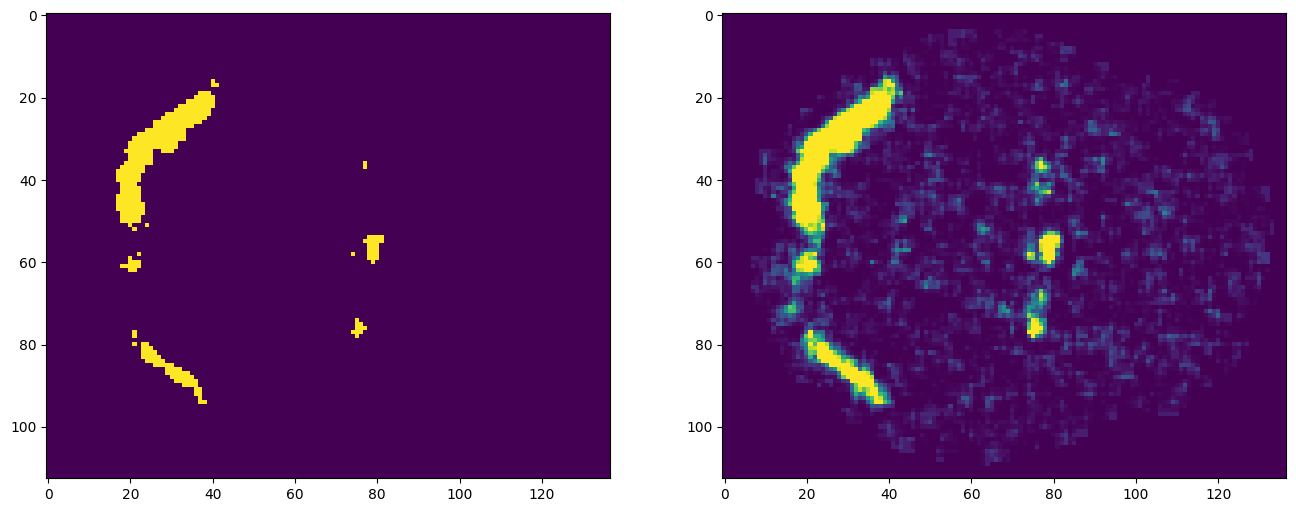

In [261]:
idx = np.where(p>=1e-4)[0]
mask = np.ones(p.shape)
mask[idx] = 0
slice = 36

img_gray = mask.reshape(113,137,113)
sliced_img_graymatter = img_gray[:,:,slice]

fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].imshow(sliced_img_graymatter)
ax[1].imshow(-np.log(p).reshape(113,137,113)[:,:,slice])

In [248]:
demo_filepath_whitematter = '/cis/home/jdey4/data_MRI/sub-A00008326/mri/mwp1sub-A00008326_T1w.nii'
img_demo = nb.load(demo_filepath_whitematter)
img_gray_to_save = nb.Nifti1Image(img_gray, header = img_demo.header, affine = img_demo.affine)

nb.save(img_gray_to_save, 'feature_imp_gray_rank_pval.nii')

(array([  22166.,   18211.,   23323.,   33996.,   42951.,   30679.,
          63315.,   81657.,  125833., 1307222.]),
 array([9.99900010e-05, 1.00089991e-01, 2.00079992e-01, 3.00069993e-01,
        4.00059994e-01, 5.00049995e-01, 6.00039996e-01, 7.00029997e-01,
        8.00019998e-01, 9.00009999e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

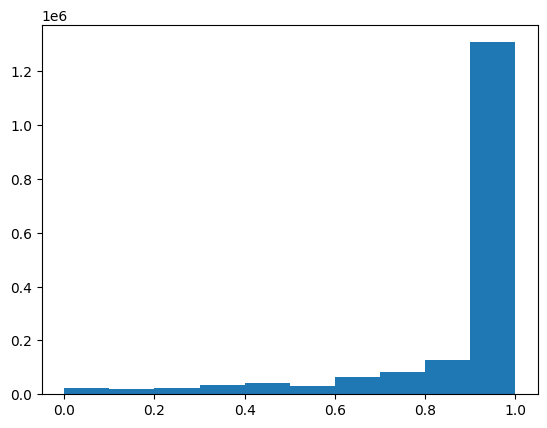

In [262]:
plt.hist(p)

In [ ]:
1. make a clear bug report
2. get feature map parcellation data for humans and monkeys
3. give white matter feature map, monkey map
4. try naive transfer, silly-F
5. do grid search
6. add age as a feature